In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Online_Exam_Answer_Attempt_Time_Analysis.csv')

In [3]:
data.head()

,Student_ID,Question_ID,Question_Difficulty,Attempt_Time_Seconds,Correct
0,S1,Q1,Easy,32,1
1,S1,Q2,Medium,58,1
2,S1,Q3,Hard,96,0
3,S1,Q4,Easy,35,1
4,S1,Q5,Medium,62,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Student_ID            75 non-null     object
 1   Question_ID           75 non-null     object
 2   Question_Difficulty   75 non-null     object
 3   Attempt_Time_Seconds  75 non-null     int64 
 4   Correct               75 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 3.1+ KB


In [5]:
data.describe()

,Attempt_Time_Seconds,Correct
count,75.000000,75.000000
mean,61.520000,0.613333
std,29.355859,0.490266
min,24.000000,0.000000
25%,36.000000,0.000000
50%,57.000000,1.000000
75%,81.000000,1.000000
max,145.000000,1.000000


In [6]:
data.isnull().sum()

,0
Student_ID,0
Question_ID,0
Question_Difficulty,0
Attempt_Time_Seconds,0
Correct,0


In [7]:
data.duplicated().sum()

np.int64(0)

In [15]:
data.groupby('Question_ID')['Attempt_Time_Seconds'].sum()

,Attempt_Time_Seconds
Question_ID,
Q1,505
Q2,956
Q3,1606
Q4,534
Q5,1013


In [16]:
data.groupby('Question_ID')['Attempt_Time_Seconds'].mean()

,Attempt_Time_Seconds
Question_ID,
Q1,33.666667
Q2,63.733333
Q3,107.066667
Q4,35.600000
Q5,67.533333


In [17]:
data.groupby('Question_Difficulty')['Attempt_Time_Seconds'].mean()

,Attempt_Time_Seconds
Question_Difficulty,
Easy,34.633333
Hard,107.066667
Medium,65.633333


In [18]:
data.groupby('Question_Difficulty')['Attempt_Time_Seconds'].std()

,Attempt_Time_Seconds
Question_Difficulty,
Easy,7.448598
Hard,19.054308
Medium,11.397166


In [19]:
corr = data.corr(numeric_only=True)

In [20]:
corr

,Attempt_Time_Seconds,Correct
Attempt_Time_Seconds,1.00000,-0.62057
Correct,-0.62057,1.00000


<Axes: >

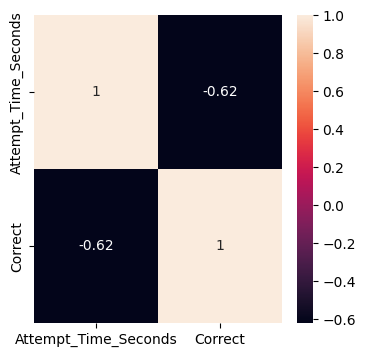

In [23]:
plt.figure(figsize=(4,4))
sns.heatmap(corr, annot=True)

Text(0, 0.5, 'Correct (0 = Wrong, 1 = Correct)')

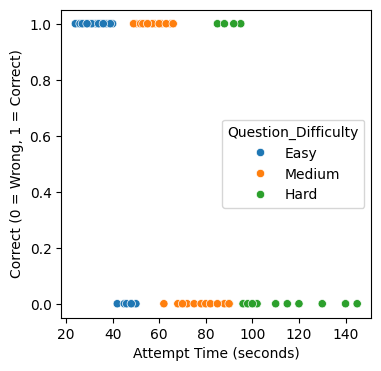

In [36]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=data, y='Correct', x='Attempt_Time_Seconds', hue='Question_Difficulty')
plt.xlabel("Attempt Time (seconds)")
plt.ylabel("Correct (0 = Wrong, 1 = Correct)")

Text(0, 0.5, 'Attempt Time (seconds)')

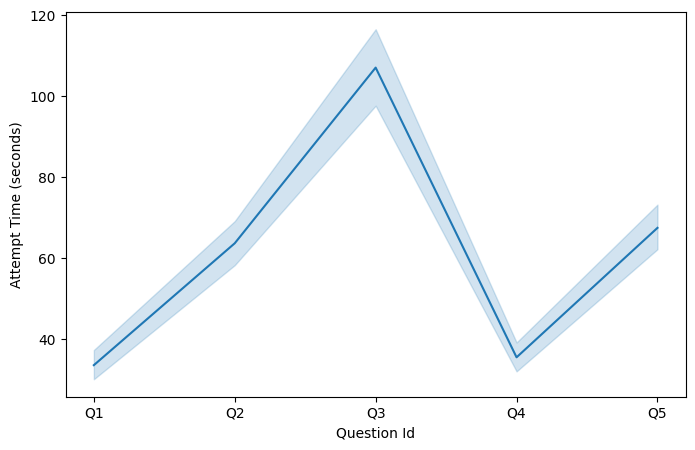

In [40]:
plt.figure(figsize=(8,5))
sns.lineplot(data=data, y='Attempt_Time_Seconds', x='Question_ID')
plt.xlabel("Question Id")
plt.ylabel("Attempt Time (seconds)")